In [ ]:
import pandas as pd
import numpy as np
import json
import os, glob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [ ]:
# load json file using pandas
df1 = pd.read_json('Part1 - Car-Attributes.json')


In [ ]:
# convert dataframe to csv file
df1.to_csv("Part1-Cars-A.csv",index=False)

In [ ]:
df2 = pd.read_csv("Part1 - Car name.csv")

In [ ]:
df = pd.concat([df1, df2], axis=1, join='inner')


print(df.head())
df.to_csv('cars_merged.csv')

    mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0  18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140  3449  10.5  70       1                ford torino


In [ ]:
df.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [ ]:
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [ ]:
df.shape

(398, 9)

In [ ]:
df.size

3582

In [ ]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
carDataAttr=df.iloc[:,[0,1,2,3,4,5]]
carDataAttr.head()

,mpg,cyl,disp,hp,wt,acc
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


In [ ]:
carDataAttr.isna().sum()

mpg     0
cyl     0
disp    0
hp      0
wt      0
acc     0
dtype: int64

In [ ]:
# Na shows no missing value, but on careful data observation we could see "?" for hp 
carDataAttr[carDataAttr['hp']=="?"]

,mpg,cyl,disp,hp,wt,acc
32,25.0,4,98.0,?,2046,19.0
126,21.0,6,200.0,?,2875,17.0
330,40.9,4,85.0,?,1835,17.3
336,23.6,4,140.0,?,2905,14.3
354,34.5,4,100.0,?,2320,15.8
374,23.0,4,151.0,?,3035,20.5


In [ ]:
# Now try to impute with mean of respective cylinders, but before this we must see the distribution for the variable
# We would drop na values and check distribution before taking call on whether imputation would be through mean, median 
import seaborn as sns
hp = carDataAttr['hp'].dropna()
hp.count()

398

In [35]:
 carDataAttr['hp'] =  carDataAttr['hp'].apply(str).str.replace('?','')

In [39]:
 carDataAttr['hp'] = pd.to_numeric( carDataAttr['hp'], errors='coerce')
 carDataAttr =  carDataAttr.dropna(subset=['hp'])
 carDataAttr['hp'] =  carDataAttr['hp'].astype(float)

In [40]:
import seaborn as sns
hp = carDataAttr['hp']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


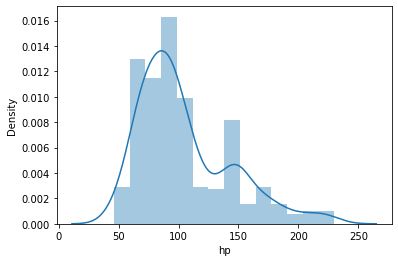

In [41]:
sns.distplot(pd.to_numeric(hp))

In [ ]:
carDataScaled=carDataAttr.apply(zscore)
carDataScaled.head(10)

In [ ]:
#importing seaborn for statistical plots
sns.pairplot(carDataScaled, height=2,aspect=2 , diag_kind='kde')

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

In [ ]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [ ]:
model.fit(carDataScaled)

In [ ]:
carDataAttr['labels'] = model.labels_
carDataAttr.head(10)

#carDataAttr.groupby(["labels"]).count()

In [ ]:
carDataClust = carDataAttr.groupby(['labels'])

In [ ]:
carDataClust.mean()

In [ ]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [ ]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(carDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(carDataScaled))

c

In [ ]:
plt.figure(figsize=(50, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(carDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(carDataScaled))

c

In [ ]:
plt.figure(figsize=(50, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [ ]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(carDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(carDataScaled))

c

In [ ]:
plt.figure(figsize=(50, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

Conclusion : the Avergae method is giving us good results and complete method giving us very low results.